In [17]:
import pm4py as pm
import pandas as pd
from IPython.display import  display, SVG
from pm4py.visualization.dfg import visualizer as dfg_visualizer
import os


Number of clusters:  6

=== Complete Log DFG (All Clusters) ===


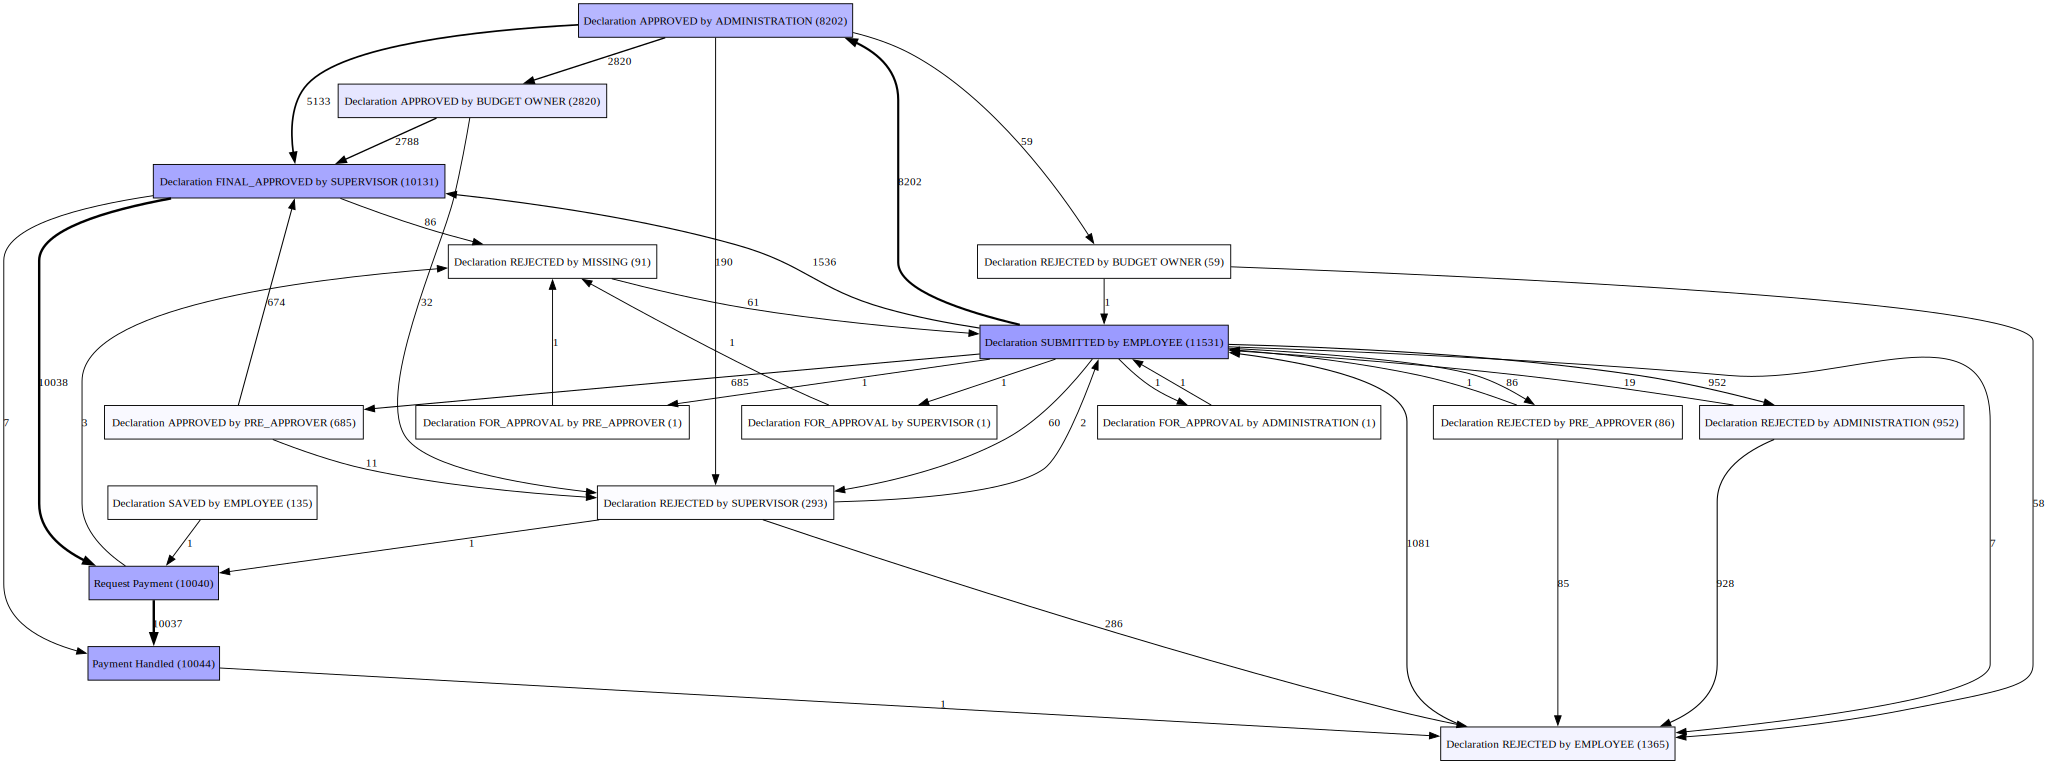


=== Processing Cluster 0 ===


exporting log, completed traces ::   0%|          | 0/613 [00:00<?, ?it/s]

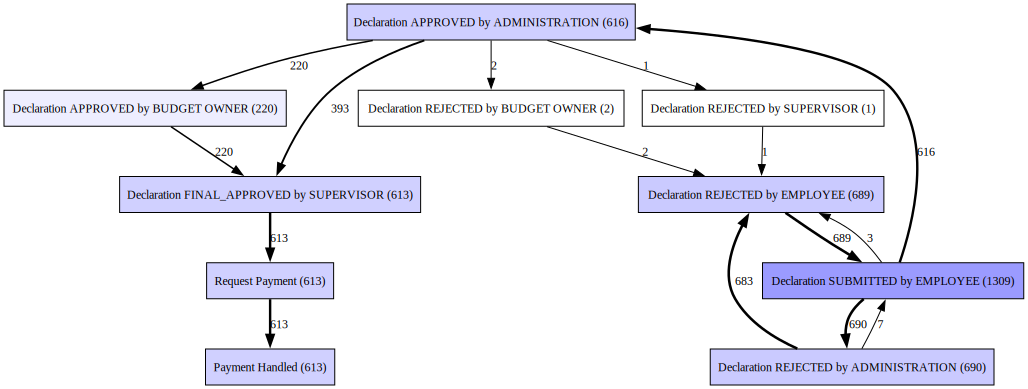


=== Processing Cluster 1 ===


exporting log, completed traces ::   0%|          | 0/583 [00:00<?, ?it/s]

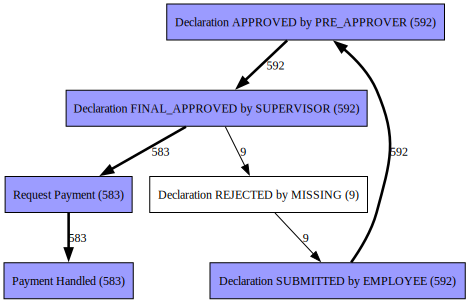


=== Processing Cluster 2 ===


exporting log, completed traces ::   0%|          | 0/1433 [00:00<?, ?it/s]

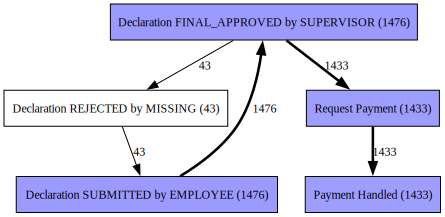


=== Processing Cluster 3 ===


exporting log, completed traces ::   0%|          | 0/2473 [00:00<?, ?it/s]

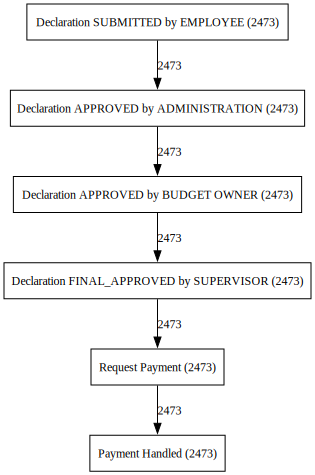


=== Processing Cluster 4 ===


exporting log, completed traces ::   0%|          | 0/4618 [00:00<?, ?it/s]

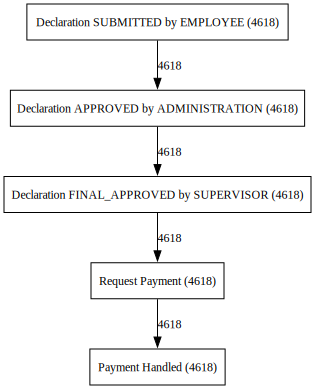

In [ ]:
# load the clustered event log data
# Use relative path from notebook location (miscellaneous folder)
log_path = "../DomesticDeclarations_clustered.csv"
log_og = pd.read_csv(log_path)

cols = ["case:concept:name", "concept:name", "time:timestamp", "cluster"]
print("Number of clusters: ", log_og["cluster"].nunique())

log_og["time:timestamp"] = pd.to_datetime(log_og["time:timestamp"])

log2_og = pm.convert.convert_to_event_log(log_og)

print("\n=== Complete Log DFG (All Clusters) ===")
dfg, start, end = pm.discover_dfg(log2_og)

parameters = {
    dfg_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "svg", # use svg for better quality
    dfg_visualizer.Variants.FREQUENCY.value.Parameters.RANKDIR: "TB",  
    dfg_visualizer.Variants.FREQUENCY.value.Parameters.BGCOLOR: "white"
}
gviz = dfg_visualizer.apply(dfg, log=log2_og, variant=dfg_visualizer.Variants.FREQUENCY, parameters=parameters)
dfg_visualizer.save(gviz, os.path.join("results_dfg_visualizing","dfg_cluster_total.svg"), parameters=parameters)

display(SVG(filename=os.path.join("results_dfg_visualizing","dfg_cluster_total.svg")))

for cluster in range(0, 5):
    print(f"\n=== Processing Cluster {cluster} ===")

    log = log_og.loc[log_og['cluster'] == cluster, cols]

    log = pm.convert.convert_to_event_log(log)

    pm.write_xes(log, os.path.join("results_dfg_visualizing","xes",f"DomesticDeclarations_cluster_{cluster}.xes"))

    dfg, start, end = pm.discover_dfg(log)
    

    gviz = dfg_visualizer.apply(dfg, log=log, variant=dfg_visualizer.Variants.FREQUENCY, parameters=parameters)
    dfg_visualizer.save(gviz, os.path.join("results_dfg_visualizing","cluster_dfgs",f"dfg_cluster_{cluster}.svg"), parameters=parameters)
    
    display(SVG(filename=os.path.join("results_dfg_visualizing","cluster_dfgs",f"dfg_cluster_{cluster}.svg")))
